In [2]:
import os
from google.colab import files

# 1. Upload your Kaggle API token (kaggle.json)
print("Please upload your kaggle.json file:")
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Move kaggle.json into the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 2. Download the dataset using the Kaggle API

# Extract dataset name from URL
dataset_url = "https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset"
dataset_name = dataset_url.split("/datasets/")[1]

#Check if the dataset name is valid
try:
    !kaggle datasets metadata $dataset_name
except:
    print(f"Error: Dataset '{dataset_name}' not found. Please check the dataset name.")
    raise

# Download the dataset. Use -p to specify the download path.
!kaggle datasets download -d $dataset_name -p /content

# 3. Unzip the dataset (if it's a zip file)
import zipfile
import glob

zip_files = glob.glob("/content/*.zip")
if zip_files:
    dataset_zip = zip_files[0]
    print(f"Found zip file: {dataset_zip}")
    try:
        with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
            zip_ref.extractall("/content")  # Extract to the /content directory
        print("Dataset extracted successfully.")
        os.remove(dataset_zip) #Remove the zip file after extraction
    except zipfile.BadZipFile:
        print(f"Error: {dataset_zip} is not a valid zip file or is corrupted.")
else:
    print("No zip files found. Assuming the dataset is not zipped.")

# 4. List the files in the /content directory to verify
print("\nFiles in /content directory:")
!ls /content

# Example of reading a CSV file (if applicable)
import pandas as pd
import glob
csv_files = glob.glob("/content/*.csv")
if csv_files:
    try:
        df = pd.read_csv(csv_files[0])
        print("\nFirst 5 rows of the CSV file:")
        print(df.head())
    except pd.errors.ParserError:
        print(f"Could not parse {csv_files[0]} as a CSV file. It may have a different format.")
else:
    print("No CSV files found in the dataset.")

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes
Downloaded metadata to /content/dataset-metadata.json
Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:04<00:00, 23.6MB/s]
100% 2.70G/2.70G [02:04<00:00, 23.3MB/s]
Found zip file: /content/new-plant-diseases-dataset.zip
Dataset extracted successfully.

Files in /content directory:
 dataset-metadata.json			 'New Plant Diseases Dataset(Augmented)'   test
'new plant diseases dataset(augmented)'   sample_data
No CSV files found in the dataset.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import os

# ... (rest of your existing code) ...

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the training data
training_data_path = os.path.join(current_directory, 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')

training_set = tf.keras.utils.image_dataset_from_directory(
    training_data_path,  # Use the constructed path here
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
import os

# ... (rest of your existing code) ...

# Get the current working directory (if not already done)
current_directory = os.getcwd()

# Construct the path to the validation data
validation_data_path = os.path.join(current_directory, 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid')

validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_data_path,  # Use the constructed path here
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,  # You might want to set this to False for validation
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
cnn = tf.keras.models.Sequential()

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 171s 69ms/step - accuracy: 0.3848 - loss: 2.1894 - val_accuracy: 0.7993 - val_loss: 0.6539
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 171s 62ms/step - accuracy: 0.8282 - loss: 0.5401 - val_accuracy: 0.9031 - val_loss: 0.3020
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.9008 - loss: 0.3139 - val_accuracy: 0.9112 - val_loss: 0.2627
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9304 - loss: 0.2108 - val_accuracy: 0.9158 - val_loss: 0.2630
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9472 - loss: 0.1617 - val_accuracy: 0.9575 - val_loss: 0.1312
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9613 - loss: 0.1180 - val_accuracy: 0.9516 - val_loss: 0.1520
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 201s 64ms/step - accuracy: 0.9665 - loss: 0.1012 - val_accuracy: 0.9525 - val_loss: 0.1530
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.9929 - loss: 0.0219
Training accuracy: 0.9936268329620361


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9697 - loss: 0.1041
Validation accuracy: 0.969155490398407


In [22]:
cnn.save('trained_plant_disease_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5874243974685669,
  0.8544420003890991,
  0.9086563587188721,
  0.9373924136161804,
  0.9526993632316589,
  0.9632975459098816,
  0.969144344329834,
  0.9743509292602539,
  0.9789458513259888,
  0.9812504649162292],
 'loss': [1.4040768146514893,
  0.457934707403183,
  0.2840195596218109,
  0.19254423677921295,
  0.14538368582725525,
  0.1112704873085022,
  0.09381987154483795,
  0.07610241323709488,
  0.06327876448631287,
  0.05626540631055832],
 'val_accuracy': [0.799282968044281,
  0.9030844569206238,
  0.9111654758453369,
  0.9157751202583313,
  0.9574891924858093,
  0.9516276121139526,
  0.952481210231781,
  0.9556112289428711,
  0.9685863852500916,
  0.969155490398407],
 'val_loss': [0.6539429426193237,
  0.30203166604042053,
  0.2626659572124481,
  0.26301518082618713,
  0.1312345564365387,
  0.1519741415977478,
  0.15295705199241638,
  0.15060172975063324,
  0.09871368110179901,
  0.10557453334331512]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


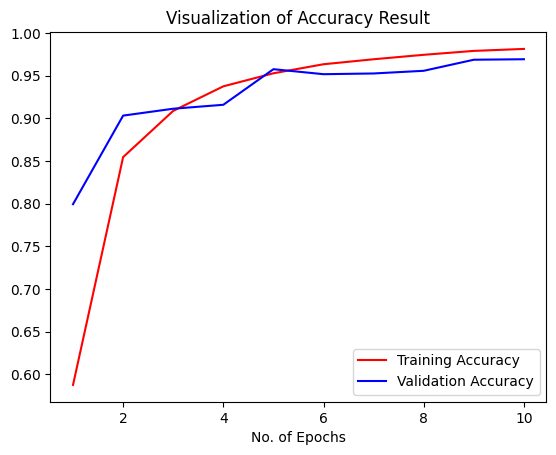

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [27]:
class_name = validation_set.class_names

In [29]:
import os

# ... (rest of your existing code) ...

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the training data
valid_data_path = os.path.join(current_directory, 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid')

test_set = tf.keras.utils.image_dataset_from_directory(
    valid_data_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:

Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.90      0.94       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.97      0.94      0.95       502
                               Blueberry___healthy       0.92      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.93      0.94       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.97      0.

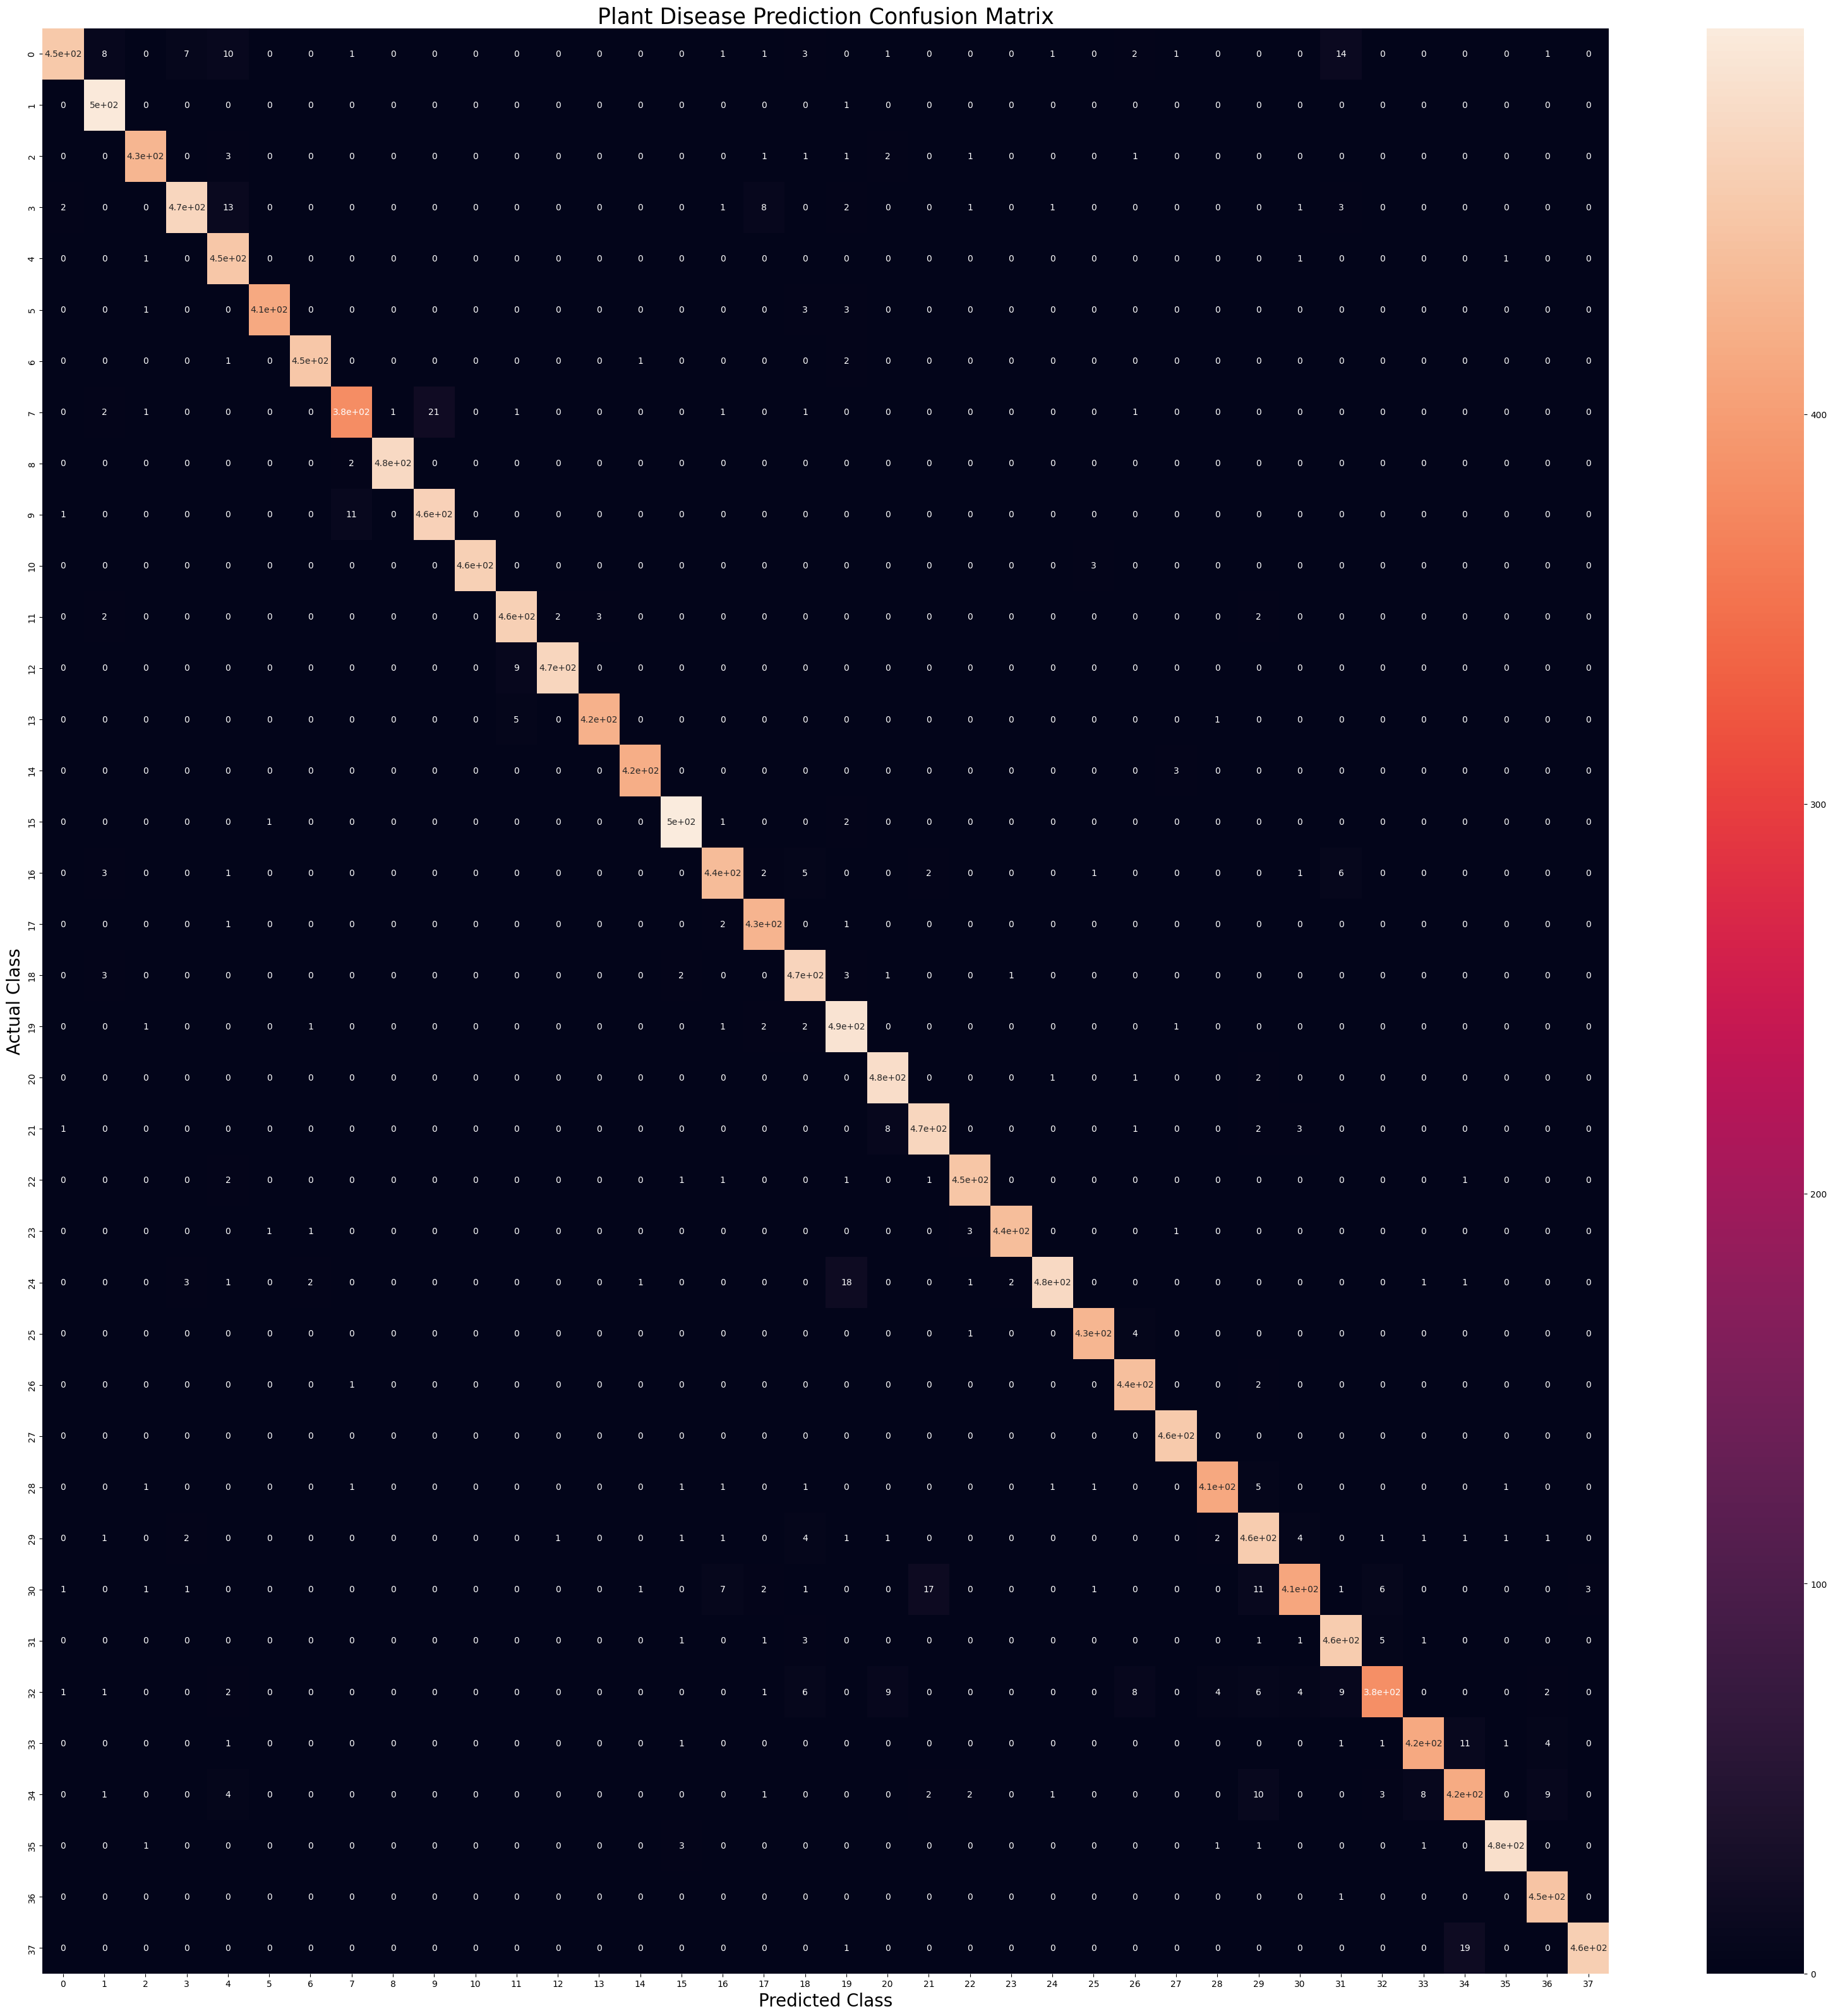

In [36]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()